# This notebook organises the datasets & generates the plots presented in Lazarus, Williams & Goldstein (DOI TBD).

There are three datasets of washover morphometry used here:

* (1) the results of a physical experiment conducted at the Total Environment Simulator (TES), at the University of Hull (UK), and is referred to as the "TES dataset" – available from: [https://doi.org/10.5281/zenodo.6640209]

* (2) a sample of lidar-dervied measurements of washover into non-built and built settings in New Jersey, USA, following Hurricane Sandy (2012) – available from: [https://doi.org/10.5281/zenodo.6638548]

* (3) a sample of washover morphometry reported in published literature – available from: [https://doi.org/10.5281/zenodo.6638548]

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import math

# Import curve-fitting package from scipy
from scipy.optimize import curve_fit
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## (1) Downloading & organising the TES dataset:

In [2]:
# Import the morphometric measurements for the TES experiments:
url = 'https://zenodo.org/record/6640209/files/TES_washover_morphometry.csv?download=1'

TES = pd.read_csv(url)

TES.head(3) # check to confirm

,id,throat_width_m,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset
0,1.01,0.082206,0.092376,0.244976,0.020457,0.000204,0.762242,0.0,inundation,TES
1,1.02,0.277368,0.377690,0.408757,0.113760,0.002044,1.395510,0.0,inundation,TES
2,1.03,0.255725,0.445567,0.369243,0.157086,0.002642,1.564430,0.0,inundation,TES


In [3]:
# Reorganise column sequence for tidiness
cols = ['id',
        'throat_width_m',
        'deposit_width_m',
        'intrusion_length_m',
        'deposit_area_m2',
        'deposit_volume_m3',
        'deposit_perimeter_m',
        'built_fraction',
        'forcing_mode',
        'dataset']

TES = TES[cols]

TES.head(3) # check to confirm 

,id,throat_width_m,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset
0,1.01,0.082206,0.092376,0.244976,0.020457,0.000204,0.762242,0.0,inundation,TES
1,1.02,0.277368,0.377690,0.408757,0.113760,0.002044,1.395510,0.0,inundation,TES
2,1.03,0.255725,0.445567,0.369243,0.157086,0.002642,1.564430,0.0,inundation,TES


In [4]:
# Sort dataframe by built fraction, forcing mode, and dataset:

TES.sort_values(by=['built_fraction', 'forcing_mode'], inplace=True)

TES.tail(5) # check bottom of dataframe to confirm 

,id,throat_width_m,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset
206,9.10,0.097818,0.432912,0.757996,0.113139,0.001327,2.463610,0.53,waves,TES
207,9.11,0.094648,0.373857,0.681676,0.082017,0.000970,2.031520,0.53,waves,TES
208,9.12,0.049861,0.264352,0.312172,0.039177,0.000234,1.130760,0.53,waves,TES
209,9.13,0.072424,0.273930,0.193896,0.029115,0.000220,0.988562,0.53,waves,TES
210,9.14,0.182829,0.431728,0.534937,0.093249,0.000736,2.339090,0.53,waves,TES


In [5]:
# Round (bin) built fraction to nearest tenth, and add that rounded value to the dataframe:

# pull necessary series:
bf = TES.loc[:,'built_fraction'] # built fraction

bf_round = round(bf, 1) # round elements in series to one decimal place
bf_round.tail(10) # check to confirm 

201    0.5
202    0.5
203    0.5
204    0.5
205    0.5
206    0.5
207    0.5
208    0.5
209    0.5
210    0.5
Name: built_fraction, dtype: float64

In [6]:
# Add rounded built fraction to the dataframe, and rearrange the columns

TES.insert(10, 'bf_rounded', bf_round)

TES.tail(10) # check to confirm 

,id,throat_width_m,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset,bf_rounded
201,9.05,0.124608,0.318318,0.761883,0.081027,0.001018,2.152310,0.53,waves,TES,0.5
202,9.06,0.090810,0.280903,0.831056,0.111762,0.001173,2.306470,0.53,waves,TES,0.5
203,9.07,0.091437,0.298488,0.825970,0.122265,0.001300,2.428150,0.53,waves,TES,0.5
204,9.08,0.084811,0.291233,0.725017,0.084915,0.000903,2.101900,0.53,waves,TES,0.5
205,9.09,0.085410,0.243269,0.694004,0.070542,0.000800,1.933680,0.53,waves,TES,0.5
206,9.10,0.097818,0.432912,0.757996,0.113139,0.001327,2.463610,0.53,waves,TES,0.5
207,9.11,0.094648,0.373857,0.681676,0.082017,0.000970,2.031520,0.53,waves,TES,0.5
208,9.12,0.049861,0.264352,0.312172,0.039177,0.000234,1.130760,0.53,waves,TES,0.5
209,9.13,0.072424,0.273930,0.193896,0.029115,0.000220,0.988562,0.53,waves,TES,0.5
210,9.14,0.182829,0.431728,0.534937,0.093249,0.000736,2.339090,0.53,waves,TES,0.5


### A few summary (aggregate) statistics:

In [7]:
# how many deposits from each forcing mode?

fm = pd.DataFrame(TES
       .groupby('forcing_mode')
       .agg('count')
       .loc[:, 'id']
      )

fm.rename({'id': 'counts'}, axis=1, inplace=True)
fm.reset_index(inplace=True)

fm

,forcing_mode,counts
0,inundation,182
1,waves,319


In [8]:
# how many deposits in each condition for (rounded) built fraction?

bfs = pd.DataFrame(TES
       .groupby('bf_rounded')
       .agg('count')
       .loc[:, 'id']
      )

bfs.rename({'id': 'counts'}, axis=1, inplace=True)
bfs.reset_index(inplace=True)

bfs

,bf_rounded,counts
0,0.0,142
1,0.2,26
2,0.3,141
3,0.4,141
4,0.5,51


In [9]:
# Compile various counts from TES experiments:

TES_counts = pd.DataFrame({'subset':
                        ['non-built',
                         'built',
                         'inundation',
                         'waves',
                         'binned bf = 0',
                         'binned bf = 0.2',
                         'binned bf = 0.3',
                         'binned bf = 0.4',
                         'binned bf = 0.5'],
                           'counts':np.zeros(9)})

TES_counts['counts']=TES_counts['counts'].astype(int)


# populate the table

TES_counts.iloc[0,1] = bfs.iloc[0,1] # total non-built

TES_counts.iloc[1,1]=bfs.iloc[1:,1].sum() # total built

TES_counts.iloc[2:4,1]=fm.iloc[:, 1].values # forcing mode

TES_counts.iloc[4:,1]=bfs.iloc[:,1].values # various built fractions

TES_counts.set_index('subset', inplace=True) # change the index (for clarity)

TES_counts

,counts
subset,
non-built,142
built,359
inundation,182
waves,319
binned bf = 0,142
binned bf = 0.2,26
binned bf = 0.3,141
binned bf = 0.4,141
binned bf = 0.5,51


## (2) Working with FIELD-SCALE DATA (lidar, literature)

In [10]:
# Import the morphometric measurements for the Sandy measurements (New Jersey):
url = 'https://zenodo.org/record/6638548/files/NJ_Sandy_metrics.csv?download=1'

NJ = pd.read_csv(url)
# NJ = pd.read_csv('NJ_Sandy_metrics.csv')

NJ.head(3) # check to confirm

,id,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,storm,location
0,1,139.577283,157.231077,13143.695800,7083.19,693.873109,0.0,Sandy,NJ south
1,2,147.087498,189.099711,17699.772950,8881.78,626.622060,0.0,Sandy,NJ south
2,3,92.756468,112.700606,6941.775391,3656.19,361.882928,0.0,Sandy,NJ south


In [11]:
# Sort dataframe by built fraction, forcing mode, and dataset:

NJ.sort_values(by=['built_fraction'], inplace=True)

NJ.tail(5) # check bottom of dataframe to confirm 

,id,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,storm,location
53,54,25.414613,116.317974,1497.838623,383.87,365.697968,0.512765,Sandy,NJ south
145,83,27.149664,87.369753,961.434082,658.13,307.944883,0.524909,Sandy,NJ north
50,51,44.054933,113.562421,1756.012695,368.31,396.087439,0.539808,Sandy,NJ south
46,47,39.419095,136.303593,1876.976318,518.77,414.853079,0.543682,Sandy,NJ south
141,79,19.836699,48.768009,468.728516,319.71,139.223458,0.607735,Sandy,NJ north


In [12]:
# Round (bin) built fraction to nearest tenth, and add that rounded value to the dataframe:

# pull necessary series:
bf = NJ.loc[:,'built_fraction'] # built fraction

bf_round = round(bf, 1) # round elements in series to one decimal place
# bf_round.tail(10) # check to confirm

NJ['bf_rounded'] = bf_round

NJ.head(3)

,id,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,storm,location,bf_rounded
0,1,139.577283,157.231077,13143.695800,7083.19,693.873109,0.0,Sandy,NJ south,0.0
1,2,147.087498,189.099711,17699.772950,8881.78,626.622060,0.0,Sandy,NJ south,0.0
2,3,92.756468,112.700606,6941.775391,3656.19,361.882928,0.0,Sandy,NJ south,0.0


In [13]:
# Create a new categorical column for dataset (to distinguish from others)
dataset = pd.Series(['NJ Sandy']*(NJ.shape[0]), dtype='category')
NJ['dataset'] = dataset

NJ.head(3)

,id,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,storm,location,bf_rounded,dataset
0,1,139.577283,157.231077,13143.695800,7083.19,693.873109,0.0,Sandy,NJ south,0.0,NJ Sandy
1,2,147.087498,189.099711,17699.772950,8881.78,626.622060,0.0,Sandy,NJ south,0.0,NJ Sandy
2,3,92.756468,112.700606,6941.775391,3656.19,361.882928,0.0,Sandy,NJ south,0.0,NJ Sandy


In [14]:
# Reorganise column sequence for tidiness

cols = ['id',
        'deposit_width_m',
        'intrusion_length_m',
        'deposit_area_m2',
        'deposit_volume_m3',
        'deposit_perimeter_m',
        'built_fraction',
        'bf_rounded',
        'dataset']

NJ = NJ[cols]

NJ.head(3) # check to confirm

,id,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,bf_rounded,dataset
0,1,139.577283,157.231077,13143.695800,7083.19,693.873109,0.0,0.0,NJ Sandy
1,2,147.087498,189.099711,17699.772950,8881.78,626.622060,0.0,0.0,NJ Sandy
2,3,92.756468,112.700606,6941.775391,3656.19,361.882928,0.0,0.0,NJ Sandy


In [15]:
# Import the morphometric measurements from literature:
url = 'https://zenodo.org/record/6638548/files/washover_LAV_literature_examples.csv?download=1'

LIT = pd.read_csv(url)

# LIT = pd.read_csv("washover_LAV_literature_examples.csv")


# Note that these are deposits in 'non-built' settings, so built fraction == 0
bf_zero = pd.Series(np.zeros(LIT.shape[0]), dtype='float')
LIT['built_fraction'] = bf_zero
LIT['bf_rounded'] = bf_zero

# Reorganise column sequence for tidiness
cols = ['intrusion_length_m',
        'deposit_area_m2',
        'deposit_volume_m3',
        'built_fraction',
        'bf_rounded',
        'dataset',
        'notes']

LIT = LIT[cols]

LIT.head(3) # check to confirm



,intrusion_length_m,deposit_area_m2,deposit_volume_m3,built_fraction,bf_rounded,dataset,notes
0,104,15000,21000.0,0.0,0.0,Carruthers et al. (2013),L estimated from Fig. 6
1,83,14000,23000.0,0.0,0.0,Carruthers et al. (2013),L estimated from Fig. 6
2,195,25000,24000.0,0.0,0.0,Carruthers et al. (2013),L estimated from Fig. 6


In [16]:
# Join TES, NJ & LIT dataframes into a single dataframe of all available washover data WITH VOLUME:
ALLVOLS = pd.concat([TES, NJ, LIT], ignore_index=True, sort=False)

ALLVOLS.head(3)

,id,throat_width_m,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset,bf_rounded,notes
0,1.01,0.082206,0.092376,0.244976,0.020457,0.000204,0.762242,0.0,inundation,TES,0.0,NaN
1,1.02,0.277368,0.377690,0.408757,0.113760,0.002044,1.395510,0.0,inundation,TES,0.0,NaN
2,1.03,0.255725,0.445567,0.369243,0.157086,0.002642,1.564430,0.0,inundation,TES,0.0,NaN


In [17]:
ALLVOLS.tail(3)

,id,throat_width_m,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset,bf_rounded,notes
681,NaN,NaN,NaN,41.0,2064.0,722.0,NaN,0.0,NaN,Williams & Rains (2022),0.0,L estimated from Fig. 3
682,NaN,NaN,NaN,59.0,1727.0,570.0,NaN,0.0,NaN,Williams & Rains (2022),0.0,L estimated from Fig. 3
683,NaN,NaN,NaN,26.0,748.0,217.0,NaN,0.0,NaN,Williams & Rains (2022),0.0,L estimated from Fig. 3


In [18]:
# Drop a couple of columns that aren't relevant here:
ALLVOLS = ALLVOLS.drop(labels=['id', 'throat_width_m'], axis=1)

ALLVOLS.head(3)

,deposit_width_m,intrusion_length_m,deposit_area_m2,deposit_volume_m3,deposit_perimeter_m,built_fraction,forcing_mode,dataset,bf_rounded,notes
0,0.092376,0.244976,0.020457,0.000204,0.762242,0.0,inundation,TES,0.0,NaN
1,0.377690,0.408757,0.113760,0.002044,1.395510,0.0,inundation,TES,0.0,NaN
2,0.445567,0.369243,0.157086,0.002642,1.564430,0.0,inundation,TES,0.0,NaN


## (3) GENERATING PLOTS

## Figure 3

### Fits for Fig. 3 – TES, lidar & literature washover volume vs intrusion length // volume vs area

#### Fits for VOLUME vs INTRUSION LENGTH

In [40]:
# Curve fitting for all data (TES, lidar, literature) VOLUME vs INTRUSION LENGTH

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


# Data to fit
L = ALLVOLS.loc[:,'intrusion_length_m'] # intrusion length
V = ALLVOLS.loc[:,'deposit_volume_m3'] # deposit volume


# Fit the data
parsVL, covVL = curve_fit(f=power_law, xdata=L, ydata=V, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevsVL = np.sqrt(np.diag(covVL))

# Calculate the residuals:
resVL = V - power_law(L, *parsVL)

# Calculate the residuals sum of squares:
ss_resVL = np.sum(resVL**2)

# Total sum of squares (ss_tot):
ss_totVL = np.sum((V - np.mean(V))**2)

# R_squared-value:
R_squared_VL = 1 - (ss_resVL / ss_totVL)

In [41]:
# Curve fitting for TES data only:

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


# Data to fit
Ltes = TES.loc[:,'intrusion_length_m'] # intrusion length
Vtes = TES.loc[:,'deposit_volume_m3'] # deposit volume


# Fit the data
parsTESvl, covTESvl = curve_fit(f=power_law, xdata=Ltes, ydata=Vtes, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevsTESvl = np.sqrt(np.diag(covTESvl))

# Calculate the residuals:
resTESvl = Vtes - power_law(Ltes, *parsTESvl)

# Calculate the residuals sum of squares:
ss_resTESvl = np.sum(resTESvl**2)

# Total sum of squares (ss_tot):
ss_totTESvl = np.sum((Vtes - np.mean(Vtes))**2)

# R_squared-value:
R_squared_TESvl = 1 - (ss_resTESvl / ss_totTESvl)


In [42]:
# Curve fitting for field-scale data in literature (only):

REAL = (ALLVOLS
        .loc[ALLVOLS['dataset'] != 'TES'])

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


# Data to fit
Lr = REAL.loc[:,'intrusion_length_m'] # intrusion length
Vr = REAL.loc[:,'deposit_volume_m3'] # deposit volume


# Fit the data
parsRvl, covRvl = curve_fit(f=power_law, xdata=Lr, ydata=Vr, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevsRvl = np.sqrt(np.diag(covRvl))

# Calculate the residuals:
resRvl = Vr - power_law(Lr, *parsRvl)

# Calculate the residuals sum of squares:
ss_resRvl = np.sum(resRvl**2)

# Total sum of squares (ss_tot):
ss_totRvl = np.sum((Vr - np.mean(Vr))**2)

# R_squared-value:
R_squared_Rvl = 1 - (ss_resRvl / ss_totRvl)

In [43]:
# Compile fitting stats into table:

VL_stats = pd.DataFrame({'VL fit stats':
                        ['a (coeff)',
                         'stdev a',
                         'b (scaling exp)',
                         'stdev b',
                         'R-squared'],
                           'all':np.zeros(5),
                         'TES':np.zeros(5),
                              'real field':np.zeros(5)})

VL_stats['all']=VL_stats['all'].astype(int)
VL_stats['TES']=VL_stats['TES'].astype(int)
VL_stats['real field']=VL_stats['real field'].astype(int)


# Populate the table

# ALL fit stats
VL_stats.iloc[0,1] = parsVL[0] # 'a' coefficient for inundation
VL_stats.iloc[1,1] = stdevsVL[0] # standard deviation of 'a' coeff for inundation

VL_stats.iloc[2,1] = parsVL[1] # 'b' scaling exponent for inundation
VL_stats.iloc[3,1] = stdevsVL[1] # standard deviation of 'b' scaling exponent for inundation

VL_stats.iloc[4,1] = R_squared_VL # R-squared for inundation fit


# TES fit stats
VL_stats.iloc[0,2] = parsTESvl[0] # 'a' coefficient for inundation
VL_stats.iloc[1,2] = stdevsTESvl[0] # standard deviation of 'a' coeff for inundation

VL_stats.iloc[2,2] = parsTESvl[1] # 'b' scaling exponent for inundation
VL_stats.iloc[3,2] = stdevsTESvl[1] # standard deviation of 'b' scaling exponent for inundation

VL_stats.iloc[4,2] = R_squared_TESvl # R-squared for inundation fit


# REAL FIELD fit stats
VL_stats.iloc[0,3] = parsRvl[0] # 'a' coefficient for inundation
VL_stats.iloc[1,3] = stdevsRvl[0] # standard deviation of 'a' coeff for inundation

VL_stats.iloc[2,3] = parsRvl[1] # 'b' scaling exponent for inundation
VL_stats.iloc[3,3] = stdevsRvl[1] # standard deviation of 'b' scaling exponent for inundation

VL_stats.iloc[4,3] = R_squared_Rvl # R-squared for inundation fit


VL_stats.set_index('VL fit stats', inplace=True) # change the index (for clarity)

VL_stats

,all,TES,real field
VL fit stats,,,
a (coeff),7.193091,0.005729,7.199154
stdev a,6.241126,0.000229,12.131210
b (scaling exp),1.182923,2.656256,1.182763
stdev b,0.165191,0.107985,0.320833
R-squared,0.241749,0.462336,0.093679


#### Fits for VOLUME vs AREA

In [23]:
# Curve fitting for all data (TES, lidar, literature) VOLUME vs AREA

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


# Data to fit
V = ALLVOLS.loc[:,'deposit_volume_m3'] # deposit volume
A = ALLVOLS.loc[:,'deposit_area_m2'] # deposit area


# Fit the data
parsVA, covVA = curve_fit(f=power_law, xdata=A, ydata=V, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevsVA = np.sqrt(np.diag(covVA))

# Calculate the residuals:
resVA = V - power_law(A, *parsVA)

# Calculate the residuals sum of squares:
ss_resVA = np.sum(resVA**2)

# Total sum of squares (ss_tot):
ss_totVA = np.sum((V - np.mean(V))**2)

# R_squared-value:
R_squared_VA = 1 - (ss_resVA / ss_totVA)


In [24]:
# Curve fitting for TES data only:

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


# Data to fit
Vtes = TES.loc[:,'deposit_volume_m3'] # deposit volume
Ates = TES.loc[:,'deposit_area_m2'] # deposit area


# Fit the data
parsTESva, covTESva = curve_fit(f=power_law, xdata=Ates, ydata=Vtes, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevsTESva = np.sqrt(np.diag(covTESva))

# Calculate the residuals:
resTESva = Vtes - power_law(Ates, *parsTESva)

# Calculate the residuals sum of squares:
ss_resTESva = np.sum(resTESva**2)

# Total sum of squares (ss_tot):
ss_totTESva = np.sum((Vtes - np.mean(Vtes))**2)

# R_squared-value:
R_squared_TESva = 1 - (ss_resTESva / ss_totTESva)


In [25]:
# Curve fitting for field-scale data in literature (only):

REAL = (ALLVOLS
        .loc[ALLVOLS['dataset'] != 'TES'])

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


# Data to fit
Vr = REAL.loc[:,'deposit_volume_m3'] # deposit volume
Ar = REAL.loc[:,'deposit_area_m2'] # deposit area


# Fit the data
parsRva, covRva = curve_fit(f=power_law, xdata=Ar, ydata=Vr, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevsRva = np.sqrt(np.diag(covRva))

# Calculate the residuals:
resRva = Vr - power_law(Ar, *parsRva)

# Calculate the residuals sum of squares:
ss_resRva = np.sum(resRva**2)

# Total sum of squares (ss_tot):
ss_totRva = np.sum((Vr - np.mean(Vr))**2)

# R_squared-value:
R_squared_Rva = 1 - (ss_resRva / ss_totRva)


In [26]:
# Compile fitting stats into table:

VA_stats = pd.DataFrame({'VA fit stats':
                        ['a (coeff)',
                         'stdev a',
                         'b (scaling exp)',
                         'stdev b',
                         'R-squared'],
                           'all':np.zeros(5),
                         'TES':np.zeros(5),
                              'real field':np.zeros(5)})

VA_stats['all']=VA_stats['all'].astype(int)
VA_stats['TES']=VA_stats['TES'].astype(int)
VA_stats['real field']=VA_stats['real field'].astype(int)


# Populate the table

# ALL fit stats
VA_stats.iloc[0,1] = parsVA[0] # 'a' coefficient for inundation
VA_stats.iloc[1,1] = stdevsVA[0] # standard deviation of 'a' coeff for inundation

VA_stats.iloc[2,1] = parsVA[1] # 'b' scaling exponent for inundation
VA_stats.iloc[3,1] = stdevsVA[1] # standard deviation of 'b' scaling exponent for inundation

VA_stats.iloc[4,1] = R_squared_VA # R-squared for inundation fit


# TES fit stats
VA_stats.iloc[0,2] = parsTESva[0] # 'a' coefficient for inundation
VA_stats.iloc[1,2] = stdevsTESva[0] # standard deviation of 'a' coeff for inundation

VA_stats.iloc[2,2] = parsTESva[1] # 'b' scaling exponent for inundation
VA_stats.iloc[3,2] = stdevsTESva[1] # standard deviation of 'b' scaling exponent for inundation

VA_stats.iloc[4,2] = R_squared_TESva # R-squared for inundation fit


# REAL FIELD fit stats
VA_stats.iloc[0,3] = parsRva[0] # 'a' coefficient for inundation
VA_stats.iloc[1,3] = stdevsRva[0] # standard deviation of 'a' coeff for inundation

VA_stats.iloc[2,3] = parsRva[1] # 'b' scaling exponent for inundation
VA_stats.iloc[3,3] = stdevsRva[1] # standard deviation of 'b' scaling exponent for inundation

VA_stats.iloc[4,3] = R_squared_Rva # R-squared for inundation fit


VA_stats.set_index('VA fit stats', inplace=True) # change the index (for clarity)

VA_stats

,all,TES,real field
VA fit stats,,,
a (coeff),0.112470,0.015426,0.112470
stdev a,0.029894,0.000309,0.058027
b (scaling exp),1.165308,1.072835,1.165308
stdev b,0.026282,0.013147,0.051018
R-squared,0.843660,0.881335,0.813129


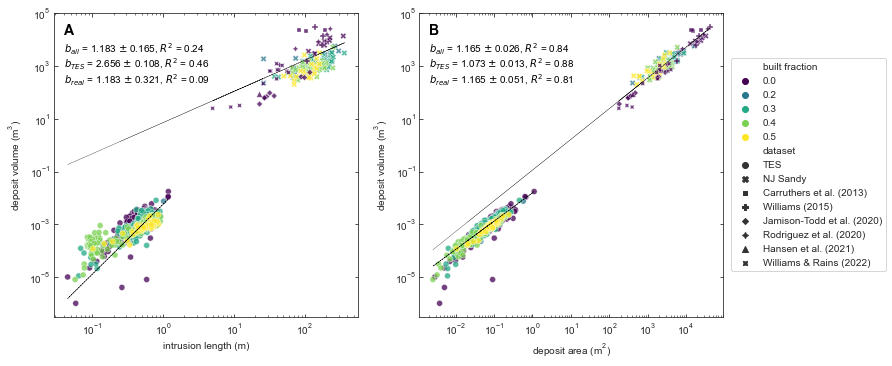

In [71]:
# Create Figure 3 – TES comparison with lidar-derived data & examples from literature

# Create new dataframe for selected data:

# Note that one deposit in the lidar data has a built fraction ~0.6, but TES data only extend to ~0.5;
# step here caps data below 0.6 for consistent colour-ramp comparison...

ALLVOLS = ALLVOLS.rename(columns={'bf_rounded': 'built fraction',
                         'forcing_mode': 'forcing mode'})

ALLVOLS_capd = (ALLVOLS
        .loc[ALLVOLS['built fraction'] < 0.6]) 


f, axes = plt.subplots(1, 2, figsize = (12, 6))

custom = {'font': 'Arial',
               'xtick.direction': 'in',
               'ytick.direction': 'in',
               'xtick.top': 'True',
               'ytick.right': 'True'}

sns.set_style('ticks', rc = custom)

# Panel A
sns.scatterplot(data = ALLVOLS_capd,
                x = 'intrusion_length_m',
                y = 'deposit_volume_m3',
                hue = 'built fraction',
                style = 'dataset',
                palette = 'viridis',
                alpha = 0.75,
                legend = None,
                ax = axes[0])

sns.despine(right=False, top=False)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_box_aspect(1)

# Plot the fit data as an overlay on the scatter data
axes[0].plot(L, power_law(L, *parsVL), linestyle='-', linewidth=0.25, color='0.4')
axes[0].plot(Ltes, power_law(Ltes, *parsTESvl), linestyle='--', linewidth=0.5, color='black')
axes[0].plot(Lr, power_law(Lr, *parsRvl), linestyle='--', linewidth=0.5, color='black')

axes[0].set_xlabel('intrusion length (m)')
axes[0].set_ylabel('deposit volume ($\mathregular{m^3}$)')


# Annotations
axes[0].annotate('$b_{all}$ = 1.183 $\pm$ 0.165, $R^2$ = 0.24', xy=(0,0.94), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')
axes[0].annotate('$b_{TES}$ = 2.656 $\pm$ 0.108, $R^2$ = 0.46', xy=(0,0.89), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')
axes[0].annotate('$b_{real}$ = 1.183 $\pm$ 0.321, $R^2$ = 0.09', xy=(0,0.84), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')


axes[0].annotate('A', xy=(0,1), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 14, color = 'black', weight = 'semibold')



# Panel B
sns.scatterplot(data = ALLVOLS_capd,
                x = 'deposit_area_m2',
                y = 'deposit_volume_m3',
                hue = 'built fraction',
                style = 'dataset',
                palette = 'viridis',
                alpha = 0.75,
                ax = axes[1])

sns.despine(right=False, top=False)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_box_aspect(1)

# Plot the fit data as an overlay on the scatter data
axes[1].plot(A, power_law(A, *parsVA), linestyle='-', linewidth=0.25, color='0.4')
axes[1].plot(Ates, power_law(Ates, *parsTESva), linestyle='--', linewidth=0.5, color='black')
axes[1].plot(Ar, power_law(Ar, *parsRva), linestyle='--', linewidth=0.5, color='black')

axes[1].set_xlabel('deposit area ($\mathregular{m^2}$)')
axes[1].set_ylabel('deposit volume ($\mathregular{m^3}$)')


# Annotation
axes[1].annotate('$b_{all}$ = 1.165 $\pm$ 0.026, $R^2$ = 0.84', xy=(0,0.94), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')
axes[1].annotate('$b_{TES}$ = 1.073 $\pm$ 0.013, $R^2$ = 0.88', xy=(0,0.89), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')
axes[1].annotate('$b_{real}$ = 1.165 $\pm$ 0.051, $R^2$ = 0.81', xy=(0,0.84), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')

axes[1].annotate('B', xy=(0,1), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 14, color = 'black', weight = 'semibold')

axes[1].legend(loc = 'center right', bbox_to_anchor = (1.55, 0.5))

# plt.savefig('TES_F3.png', dpi = 300, bbox_inches='tight')


## Figure 4

In [28]:
# Fits & KS test for Fig. 4 – TES washover volume vs area, differentiated by forcing mode:

TES = TES.rename(columns={'forcing mode': 'forcing_mode'})

# new dataframe for each forcing mode:
IND = TES[(TES.forcing_mode == 'inundation')]
WAV = TES[(TES.forcing_mode == 'waves')]

# pull V & A from each subset
V_ind = IND.loc[:,'deposit_volume_m3']
A_ind = IND.loc[:,'deposit_area_m2']

V_wav = WAV.loc[:,'deposit_volume_m3']
A_wav = WAV.loc[:,'deposit_area_m2']


# CALCULATE FITS

# function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

# INUNDATION:

# Fit the data
pars_ind, cov_ind = curve_fit(f=power_law, xdata=A_ind, ydata=V_ind, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs_ind = np.sqrt(np.diag(cov_ind))

# Calculate the residuals:
res_ind = V_ind - power_law(A_ind, *pars_ind)

# Calculate the residuals sum of squares:
ss_res_ind = np.sum(res_ind**2)

# Total sum of squares (ss_tot):
ss_tot_ind = np.sum((V_ind - np.mean(V_ind))**2)

# R_squared-value:
R_squared_ind = 1 - (ss_res_ind / ss_tot_ind)


# WAVES:

# Fit the data
pars_wav, cov_wav = curve_fit(f=power_law, xdata=A_wav, ydata=V_wav, p0=[0, 0], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs_wav = np.sqrt(np.diag(cov_wav))

# Calculate the residuals:
res_wav = V_wav - power_law(A_wav, *pars_wav)

# Calculate the residuals sum of squares:
ss_res_wav = np.sum(res_wav**2)

# Total sum of squares (ss_tot):
ss_tot_wav = np.sum((V_wav - np.mean(V_wav))**2)

# R_squared-value:
R_squared_wav = 1 - (ss_res_wav / ss_tot_wav)


In [29]:
# Compile fitting stats into table:

TES_VvA_stats = pd.DataFrame({'fit stats':
                        ['a (coeff)',
                         'stdev a',
                         'b (scaling exp)',
                         'stdev b',
                         'R-squared'],
                           'inundation':np.zeros(5),
                              'waves':np.zeros(5) })

TES_VvA_stats['inundation']=TES_VvA_stats['inundation'].astype(int)
TES_VvA_stats['waves']=TES_VvA_stats['waves'].astype(int)


# Populate the table

# Inundation fit stats
TES_VvA_stats.iloc[0,1] = pars_ind[0] # 'a' coefficient for inundation
TES_VvA_stats.iloc[1,1] = stdevs_ind[0] # standard deviation of 'a' coeff for inundation

TES_VvA_stats.iloc[2,1] = pars_ind[1] # 'b' scaling exponent for inundation
TES_VvA_stats.iloc[3,1] = stdevs_ind[1] # standard deviation of 'b' scaling exponent for inundation

TES_VvA_stats.iloc[4,1] = R_squared_ind # R-squared for inundation fit


# Wave fit stats
TES_VvA_stats.iloc[0,2] = pars_wav[0] # 'a' coefficient for inundation
TES_VvA_stats.iloc[1,2] = stdevs_wav[0] # standard deviation of 'a' coeff for inundation

TES_VvA_stats.iloc[2,2] = pars_wav[1] # 'b' scaling exponent for inundation
TES_VvA_stats.iloc[3,2] = stdevs_wav[1] # standard deviation of 'b' scaling exponent for inundation

TES_VvA_stats.iloc[4,2] = R_squared_wav # R-squared for inundation fit


TES_VvA_stats.set_index('fit stats', inplace=True) # change the index (for clarity)

TES_VvA_stats

,inundation,waves
fit stats,,
a (coeff),0.015849,0.009289
stdev a,0.000215,0.000339
b (scaling exp),0.934143,0.951653
stdev b,0.009402,0.018437
R-squared,0.972736,0.920988


In [30]:
# Two-sample KS test to quantify difference between inundation & wave distributions:

VA_ind = IND['deposit_volume_m3']/IND['deposit_area_m2'] # ratio of V:A inundation
VA_wav = WAV['deposit_volume_m3']/WAV['deposit_area_m2'] # ratio of V:A waves

stats.ks_2samp(VA_ind, VA_wav)

KstestResult(statistic=0.7905026008474284, pvalue=6.661338147750939e-16)

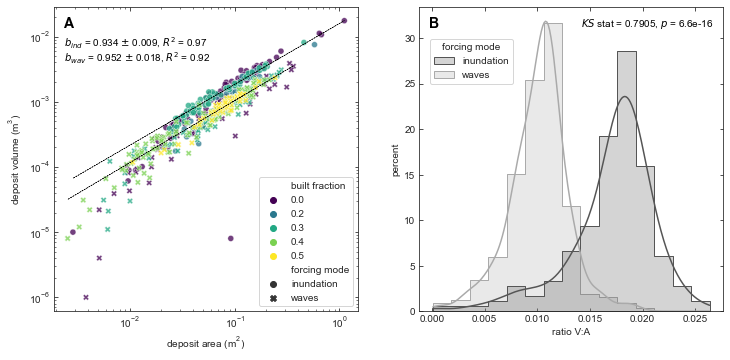

In [31]:
# Create Figure 4 – TES washover volume vs area

f, axes = plt.subplots(1, 2, figsize = (12, 6))

# Panel A
custom = {'font': 'Arial',
               'xtick.direction': 'in',
               'ytick.direction': 'in',
               'xtick.top': 'True',
               'ytick.right': 'True'}

sns.set_style('ticks', rc = custom)

TES = TES.rename(columns={'bf_rounded': 'built fraction',
                         'forcing_mode': 'forcing mode'})


sns.scatterplot(data = TES,
            x = 'deposit_area_m2', y = 'deposit_volume_m3',
            hue = 'built fraction',
            style = 'forcing mode',
            palette = 'viridis',
            alpha = 0.75,
            ax = axes[0],
                legend = 'auto')


# Plot the fit data as an overlay on the scatter data

axes[0].plot(A_ind, power_law(A_ind, *pars_ind), linestyle='--', linewidth=0.5, color='black')
axes[0].plot(A_wav, power_law(A_wav, *pars_wav), linestyle='--', linewidth=0.5, color='black')


sns.despine(right=False, top=False)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_box_aspect(1)

axes[0].set_xlabel('deposit area ($\mathregular{m^2}$)')
axes[0].set_ylabel('deposit volume ($\mathregular{m^3}$)')
axes[0].legend(loc = 'lower right')

axes[0].annotate('A', xy=(0,1), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 14, color = 'black', weight = 'semibold')

axes[0].annotate('$b_{ind}$ = 0.934 $\pm$ 0.009, $R^2$ = 0.97', xy=(0,0.94), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')
axes[0].annotate('$b_{wav}$ = 0.952 $\pm$ 0.018, $R^2$ = 0.92', xy=(0,0.89), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')


# Panel B
custom = {'font': 'Arial',
               'xtick.direction': 'in',
               'ytick.direction': 'in',
               'xtick.top': 'True',
               'ytick.right': 'True'}

sns.set_style('ticks', rc = custom)

sns.histplot(data = TES,
            x = TES['deposit_volume_m3']/TES['deposit_area_m2'],
            hue = 'forcing mode',
            stat = 'percent',
            element = 'step',
            fill = True,
            kde = True,
            common_norm = False,
            palette = 'gray',
           ax = axes[1])
plt.xlabel('ratio V:A')
plt.ylabel('percent')

axes[1].set_box_aspect(1)

sns.move_legend(axes[1], loc = 'center left', bbox_to_anchor = (0.02, 0.82))

axes[1].annotate('B', xy=(0,1), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 14, color = 'black', weight = 'semibold')

axes[1].annotate('$KS$ stat = 0.7905, $p$ = 6.6e-16', xy=(0.5,1), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 10, color = 'black', weight = 'normal')

# plt.savefig('TES_F4.png', dpi = 300)
